In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW, Adam
from models import Generator, Discriminator, DCGenerator, DCDiscriminator
import seq_models as seqGAN


/tcmldrive/lib/miniconda3/envs/Noga_ECG2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda'
signal_length = 1500
batch_size = 1

gan_type = 'seq'

if gan_type == 'seq':
    # gen_weights_path = '/tcmldrive/NogaK/ECG_classification/experiments/tcml_seqGAN_3layersLSTM_1000epochs_more_dropout_in_dis_20230628_15_33_53/models/epoch_999_generator_model.pth'
    gen_weights_path = '/tcmldrive/NogaK/ECG_classification/experiments/tcml_seqGAN_3layersLSTM_1000epochs_lr_schedular_20230629_12_39_54/models/epoch_999_generator_model.pth'
    gen = seqGAN.Generator(signal_length, hidden_dim=512, n_features=100, tanh_output=True, num_layers=3)
    
else:
    # gen_weights_path = "/tcmldrive/NogaK/ECG_classification/experiments/tcml_GAN_basic_attempt_3000_epochs_20230603_16_20_11/models/epoch_2999_generator_model.pth"
    gen_weights_path = "/tcmldrive/NogaK/ECG_classification/experiments/tcml_DCGAN_new_archs_noise_size_100_declr_1e-5_genlr_1e-5_dec_opt_SGD_20230621_14_36_53/models/epoch_499_generator_model.pth"
    gen = DCGenerator(nz=100)

gen.load_state_dict(torch.load(gen_weights_path))

<All keys matched successfully>

***Generate a synthetic interval***

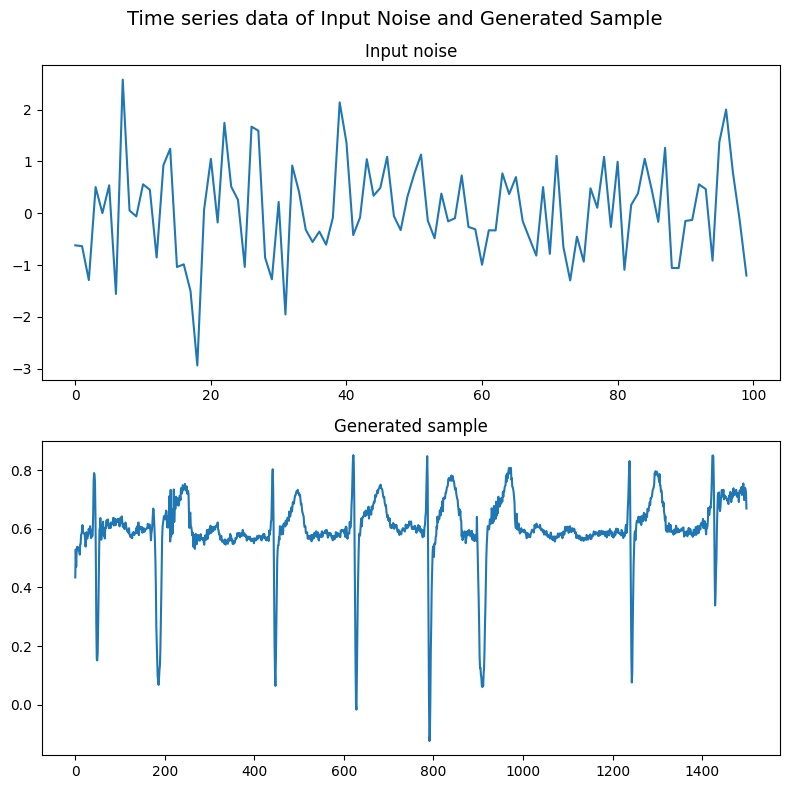

In [7]:
gen.to(device)
fixed_noise = torch.randn(batch_size, 1, 100, device=device)

if gan_type == 'seq':
    hid = gen.init_hidden(batch_size)
    fake = gen(fixed_noise, hidden=hid)
else:
    fake = gen(fixed_noise)

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(fixed_noise.detach().cpu().squeeze(1).numpy()[:].transpose())
axs[0].set_title('Input noise')

axs[1].plot(fake.detach().cpu().squeeze(1).numpy()[:].transpose())
axs[1].set_title('Generated sample')

plt.suptitle('Time series data of Input Noise and Generated Sample', fontsize=14)
plt.tight_layout()
plt.show()


***Compare histograms of input noise and generated sample***

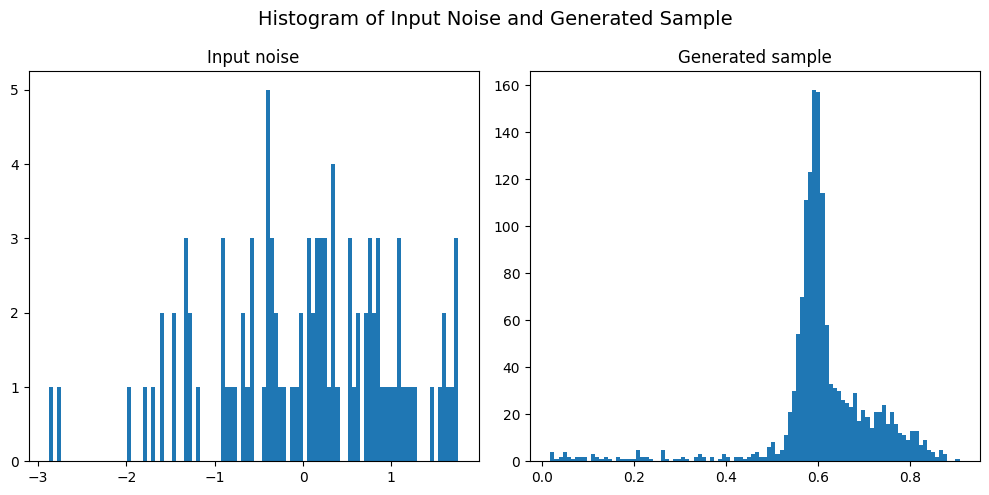

In [22]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(fixed_noise.detach().cpu().squeeze(1).numpy()[:].transpose(), bins=100)
plt.title('Input noise')

plt.subplot(1, 2, 2)
plt.hist(fake.detach().cpu().squeeze(1).numpy()[:].transpose(), bins=100)
plt.title('Generated sample')

plt.suptitle('Histogram of Input Noise and Generated Sample', fontsize=14)
plt.tight_layout()
plt.show()


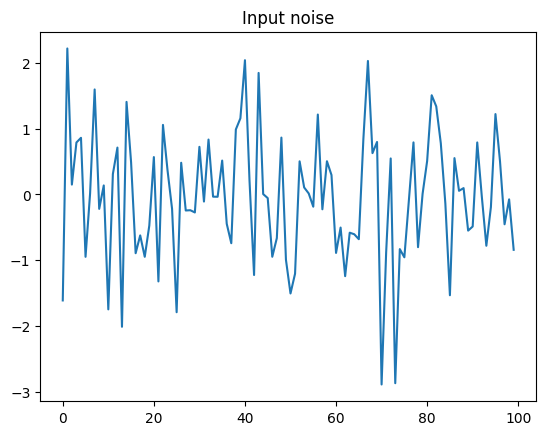

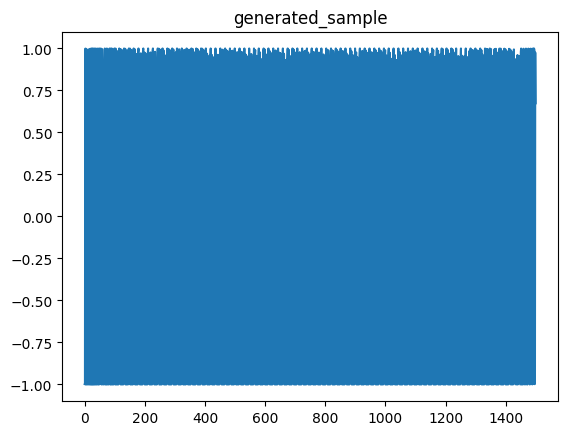

In [5]:
gen.to(device)
fixed_noise = torch.randn(batch_size, 1, 100, device=device)
fake = gen(fixed_noise)

plt.figure()
plt.plot(fixed_noise.detach().cpu().squeeze(1).numpy()[:].transpose())
plt.title(f'Input noise')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()

plt.figure()
plt.plot(fake.detach().cpu().squeeze(1).numpy()[:].transpose())
plt.title(f'generated_sample')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()

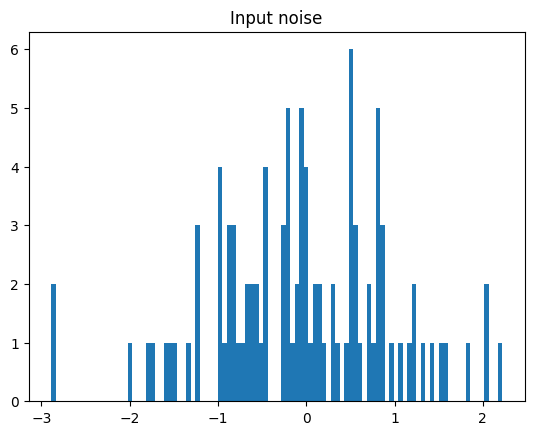

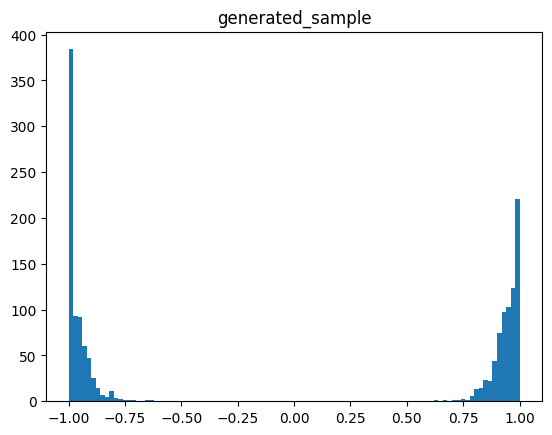

In [7]:
plt.figure()
plt.hist(fixed_noise.detach().cpu().squeeze(1).numpy()[:].transpose(),bins=100)
plt.title(f'Input noise')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()

plt.figure()
plt.hist(fake.detach().cpu().squeeze(1).numpy()[:].transpose(), bins=100)
plt.title(f'generated_sample')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()